In [4]:
%matplotlib inline

import numpy
import matplotlib.pyplot as plt
import zernike
import random

nnoll=500

Z=numpy.zeros(nnoll)

for J in range(nnoll):
    Z[J]=random.random()


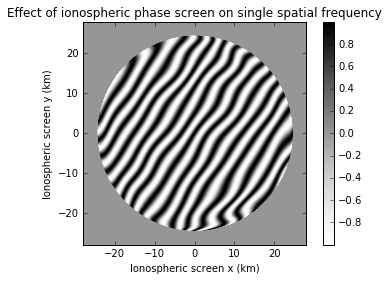

In [5]:

bnoll=10
nnoll=100

nx=512
ny=512

cenx=float(nx)/2.0
ceny=float(ny)/2.0

screen=numpy.zeros([nx, ny])
fringe=numpy.zeros([nx, ny])
screenfringe=numpy.zeros([nx, ny])

rmax=25.7 

u=60.0/float(nx)
v=90.0/float(ny)
scale=14.0/(float(nx/4))
for y in range(ny):
    x=numpy.arange(nx)
    r=scale*numpy.sqrt((x-cenx)**2+(float(y)-ceny)**2)
    phi=numpy.arctan2(float(y-ceny),x-cenx)
    for J in range(bnoll, nnoll):
        screen[:,y]=screen[:,y]+Z[J]*zernike.zernikel(J,r/rmax,phi)
        screen[:,y][r>0.95*rmax]=0.0
    screenfringe[:,y]=numpy.cos(u*x+v*y+screen[:,y])
    screenfringe[:,y][r>0.95*rmax]=0.0

    fringe[:,y]=numpy.cos(u*x+v*y)
    fringe[:,y][r>0.95*rmax]=0.0



plt.clf()
plt.imshow(screenfringe, cmap='Greys', extent=[-scale*float(nx/2),+scale*float(nx/2), \
                                               -scale*float(ny/2),+scale*float(ny/2)])
plt.xlabel('Ionospheric screen x (km)')
plt.ylabel('Ionospheric screen y (km)')
plt.title('Effect of ionospheric phase screen on single spatial frequency')
plt.colorbar()
plt.show()

<IPython.core.display.Javascript object>


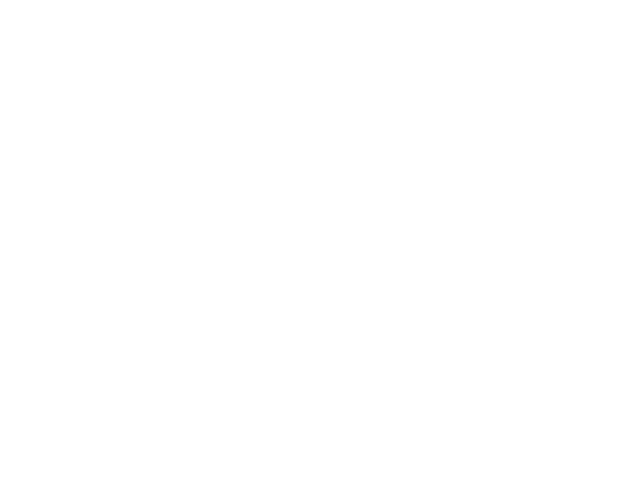

In [3]:
plt.savefig('screen.pdf')